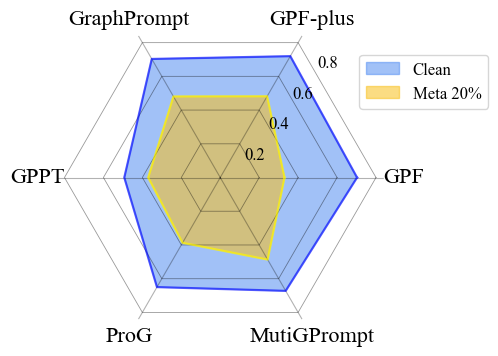

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

fontsize = 16
mpl.rcParams['xtick.labelsize'] = fontsize
mpl.rcParams['ytick.labelsize'] = fontsize
mpl.rc('font', family='Times New Roman')





# 颜色
color_list = ['#548EF2', '#F9C01C']  # 浅蓝和浅黄


############################################################################################################
# Cora
# 数据  5 shot
# labels = np.array(['GPF',      'GPF-plus',     'GraphPrompt',  'GPPT',     'ProG',     'MutiGPrompt',])
# values1 = np.array([0.6952,     0.7355,        0.6834,         0.5217,     0.6254,           0.5701])   # Meta 0.0
# values2 = np.array([0.2490,     0.1386,        0.2454,         0.0806,     0.2581,           0.2400])   # Meta 0.2
# 数据  10 shot
labels = np.array(['GPF',      'GPF-plus',     'GraphPrompt',  'GPPT',     'ProG',     'MutiGPrompt',])
values1 = np.array([0.7028,    0.7197,          0.7032,         0.4928,     0.6499,           0.6724  ])   # Meta 0.0
values2 = np.array([0.3302,    0.4819,          0.4809,         0.3702,     0.3872,           0.4869])   # Meta 0.2
############################################################################################################
# Citeseer
# 数据  5 shot
# labels = np.array( ['GPF',      'GPF-plus',     'GraphPrompt',  'GPPT',     'ProG',     'MutiGPrompt'])
# values1 = np.array([0.6565,      0.7067,        0.6848,         0.4577,     0.5531,           0.6016])   # Meta 0.0
# values2 = np.array([0.1664,      0.2224,        0.1200,         0.2107,     0.1563,           0.2043])   # Meta 0.2
# 数据  10 shot
# labels = np.array( ['GPF',      'GPF-plus',     'GraphPrompt',  'GPPT',     'ProG',     'MutiGPrompt'])
# values1 = np.array([0.7018,     0.7435,          0.6656,        0.5205,     0.5828,           0.5682])   # Meta 0.0
# values2 = np.array([0.2284,     0.1997,          0.2354,        0.2570,     0.2073,           0.2760])   # Meta 0.2

############################################################################################################


# 计算角度
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
# 使得雷达图闭合
values1 = np.concatenate((values1, [values1[0]]))
values2 = np.concatenate((values2, [values2[0]]))
angles += angles[:1]
# 创建雷达图 方法一
# fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
# 创建雷达图 方法二
# 画若干个五边形
floor = np.floor(values2.min())     # 大于最小值的最大整数
ceil = np.ceil(values1.max())       # 小于最大值的最小整数
# 设置画布大小
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, polar=True)
# np.arange()函数分为一个参数，两个参数，三个参数三种情况
# 1）一个参数时，参数值为终点，起点取默认值0，步长取默认值1。
# 2）两个参数时，第一个参数为起点，第二个参数为终点，步长取默认值1。
# 3）三个参数时，第一个参数为起点，第二个参数为终点，第三个参数为步长。其中步长支持小数。
for i in np.arange(floor, ceil, 0.2):
    ax.plot(angles, [i] * (int(len(labels)) + 1), '-', lw=0.6, color='black', alpha=0.4)



ax.spines['polar'].set_visible(False)  # 不显示极坐标最外圈的圆
# ax.grid(False)  # 不显示默认的分割线
ax.set_yticks([])  # 不显示坐标间隔

# 填充区域
ax.fill(angles, values1, color=color_list[0], alpha=0.55, label='Clean')
ax.fill(angles, values2, color=color_list[1], alpha=0.55, label='Meta 20%')
# 添加边框
ax.plot(angles, values1, color='blue',   linewidth=1.6, alpha=0.6)  # Values 1 的边框
ax.plot(angles, values2, color='yellow', linewidth=1.6, alpha=0.6)  # Values 2 的边框

# 设置标签
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# 固定一个角度标记刻度值并向外延伸
max_value = ceil
x = 0.9 # 代表angle
y = 0   # 代表长度
# 每圈间隔的刻度值
for i in np.arange(floor, max_value, 0.2):  # 刻度值范围
    if i == 0:
        continue
    y += 0.2 # x是一个方向，不用边，改变刻度值的y坐标是每一圈的间隔
    ax.text(x, y, str(round(i, 2)), horizontalalignment='left', verticalalignment='top', fontsize=12)
    # 使得刻度值在固定角度上显示
    


# 添加标题和图例
# plt.title('5 shot')
# 调整图例位置
plt.legend(loc='upper left', bbox_to_anchor=(0.9, 0.9), fontsize=12)
plt.tight_layout()
ax.grid(True, color='black', alpha=0.3)  # 网格线颜色，透明度为0.5

# 保存图片
plt.savefig('./GraphPrompt_attack_exp_Cora_10_shot.pdf', bbox_inches='tight', pad_inches=0.0)

# 显示图形
plt.show()